<div>
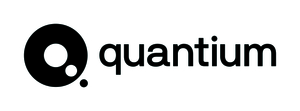
</div>

> **Program:** Quantium Virtual Internship Program <br>
> **Project Title:** Quantium Data Analytics<br>
> **Intern:** David Adarkwah <br>
> **Email:** davidwyse48@gmail.com 

## Table of Contents

* [Business Problem Understanding](#bpu)
    * [Problem Statement](#ps)
    * [Hypothesis](#hs)
    * [Project Goal](#pg)
    * [Information Needed](#in)
    * [Methodology](#my)
* [Data Preparation](#dp)
    * [Data Quality Assessment](#dqa)
        * [Purchasing Data](#pd)
        * [Transaction Data](#td)
    * [Data Cleaning and Preprocessing](#dcp)
* [Exploratory Data Analysis](#eda)
    * [Performing ANOVA Test](#pat)
    * [Testing ANOVA Assumptions](#taa)
    * [Affinity or Market-Basket Analysis](#amba)
* [Experimentation and Uplifting](#eau)
    * [Data Quality Assessment and Preprocessing](#dqap)
    * [Metrics Calculation](#mc)
    * [Determination of Control Stores](#dcs)
        * [Control Store for Trial Store 77](#77)
        * [Assessment and Difference(Trial Store 77)](#ad)
        * [Control Store for Trial Store 86](#86)
        * [Assessment and Difference(Trial Store 86)](#ad86)
        * [Control Store for Trial Store 88](#88)
        * [Assessment and Difference(Trial Store 88)](#ad88)
        * [Summary](#s)
          

## 1. Business Problem Understanding<a id='bpu'></a>

<p style="text-align:justify;">The first step in approaching a data science problem is problem understanding. This step is very important since it allows us to know the kind of decisions we want to make, the information or data that will be needed to inform those decisions and finally, the kind of analysis that will be used to arrive at those decisions. In a nutshell, developing a mental model of the problem allows us to properly structure potentially relevant information needed to solve the problem.</p>

### 1.1 Problem Statement <a id='ps'></a>

<p style="text-align:justify;">We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review. However, to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.</p>

### 1.2 Hypothesis <a id='hs'></a>

<p style="text-align:justify;">It is possible that young couples who are on premium accounts have higher purchasing behaviour as compared to the other lifestage groups.</p>

### 1.3 Project Goal <a id='pg'></a>

<p style="text-align:justify;">In this project, we will seek to achieve 3 main goals and they are;</p>

* Segment dataset and draw unique insights, including visualization of customer segments and their chip purchasing behaviour.
* Evaluate the performance of a store trial which was performed in stores 77, 86 and 88.
* Provide Julia with insights and recommendations in the form of a report that she can use when developing the strategic plan for the next half.

### 1.4 Information Needed <a id='in'></a>

<p style="text-align:justify;">In order to test the hypothesis of whether young couples who are on premium accounts have higher purchasing behaviour as compared to the other lifestage groups, we would need to acquire the data needed to test the hypothesis and perform Exploratory Data Analysis to discover more insights about other factors that might help us segment dataset and draw unique insights, including visualization of customer segments and their chip purchasing behaviour.</p>

We would need the following data to be able to perform EDA.
1. <p style="text-align:justify;"><b>Customer data</b> - which should include characteristics of each customer, for example, age, education etc.</p>
2. <p style="text-align:justify;"><b>Historical transaction data</b> – which should indicate every transaction the customer has performed.</p>

### 1.5 Methodology <a id='my'></a>

<p style="text-align:justify;">The methodology that will be used for our project will largely depend on the goals we set out to achieve. The methodlogy framework below gives us a comprehensive guide on the methodology apparoach that will help us achieve our goals.</p>
<br>
<p style="text-align:center;font-weight:bold;font-size:20px"> Methodology Framework</p>
<br>
<img src='https://artofdatablog.files.wordpress.com/2017/10/methodology-map.jpg' style="float:center;width:700px;">
<p style="text-align:justify;">Since our goal is to perform analysis of customer purchasing behaviour and not necessarily build a model, we will go by the Data Analysis segment of the methodology framework. </p>

## 2. Data Preparation <a id='dp'></a>

<p style="text-align:justify;"> An understanding of the data coupled with problem understanding will help us in cleaning and preparing our data for analysis. It is usually rare to acquire a ready-to-use data for any analysis without some level of preapration. To prepare our data, we  normally assess the quality of the data, cleanse, format, blend and sample the data since we may encounter various issues with columns in our data. These issues can include:</p>

* **`Missing values:`** meaning column values are incomplete
* **`Incorrect data:`** meaning you see values not expected for the column name
* **`Inconsistent values:`** meaning some values may fall outside the expected range
* **`uniqueness:`** meaning whether or not there are duplicate values
* **`inconsistent data type:`** meaning values entered in the columns may not be consistent with the column names

To properly prepare our data for analysis, we will perform two important tasks which are;

* Part I: Data Quality Assessment
* Part II: Data Cleaning and Preprocessing 

### 2.1 Data Quality Assessment <a id='dqa'></a>

<p style="text-align:justify;">The first task that we will perform under the data preparation step is initial assessment of the quality of data which will easily allow us to properly clean our data. We will use this section to write any code necesary for inspecting the dataset. Once completed, we will leave our report in the Data Quality Report Document.

At the end of our inspection, we will provide a summary of all of our findings.</p>

In [1]:
# we will import the libraries we will need for the data preparation step

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
from wordcloud import WordCloud, STOPWORDS
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from scipy.stats import ks_2samp,ttest_ind,t
import plotly.io as pio
from IPython.display import Image

import random
import scipy.stats as stats
import os
import random
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
from bioinfokit.analys import stat
import warnings 
warnings.filterwarnings('ignore')

sns.set(color_codes=True)
pd.set_option('display.max_columns',100)
%matplotlib inline

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
# we will load our data using pandas

purchasing = pd.read_csv('My Solution/purchase_behaviour.csv')
transaction = pd.read_csv('My Solution/transaction_data.csv')

In [4]:
# we will inspect the shape of our dataframe

print(purchasing.shape)
print(transaction.shape)

(72637, 3)
(264836, 8)


---
> <p style="text-align:justify;"> We can see from the above results that which have <b>72637</b> observations and <b>3</b> columns for the purchasing data and we have <b>264836</b> observations and <b>8</b> for the transaction data . The data is rich enough to help us perform our analysis. However, we will have to assess the quality of the data and make the necessary cleaning before setting out to achieve our goals.</p>
---

#### 2.1.1 Data Quality Assessment - Purchasing Data<a id='pd'></a>

In this step we will be assessing the quality of purchasing data and make all the possible recommendation for cleaning of this data.

In [5]:
 def data_understanding(data):
    """Function that prints all data information
        
    Args:
        data: data to be understood - dataframe
    
    Return:
        None: Only prints summary info to the scrren
    """
    
    # checking the data
    print('----- Glimpse of the Data-----\n')
    print(data.head)
    
    # checking data info
    print('\n\n----- Data Info ------\n')
    print(data.info())
    
    # viewing the columns
    print('\n\n----- Data Columns ------\n')
    print(data.columns)
    
    # viewing summary statistics
    print('\n\n----- Data Summary ------\n')
    print(data.describe(include='all'))

In [6]:
data_understanding(purchasing)

----- Glimpse of the Data-----

<bound method NDFrame.head of        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]>


----- Data Info ------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column          

Lets go ahead and check the unique values for each column

In [7]:
purchasing['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [8]:
purchasing['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [9]:
purchasing['LYLTY_CARD_NBR'].nunique()

72637

We will proceed by checking if the data contain any missing values. We can easily tell from the results of the info but we want to be extremely sure there are no missing values

In [10]:
# function to determine the percentage of missing values in our data

def missing_values(data):
    """Function that checks for null values and computes the percentage of null values
    Args:
        data: loaded dataframe
    Return:
        dataframe: dataframe of total null values with corresponding percentages
    """
    total = data.isnull().sum().sort_values(ascending=False)   # create an empty datafram
    percentage = round((total / data.shape[0]) * 100, 2)
    
    return pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])

In [11]:
# call the missing values function on data1

missing_values(purchasing)

,Total,Percentage
LYLTY_CARD_NBR,0,0.0
LIFESTAGE,0,0.0
PREMIUM_CUSTOMER,0,0.0


##### Data Quality Summary

* As stated earlier, the data is made up of 3 columns which are;
    * **`LYLTY_CARD_NBR:`**  This column represents the unique id number assigned to each customer 
    * **`LIFESTAGE:`**  This column represents the stage in life of each customer.
    * **`PREMIUM_CUSTOMER:`** This column represents the kind of service each customer is enjoying.


* Also, the data types for each column is properly formatted and thus does not require any reformatting.


*  Based on the summary statistics, the `LYLTY_CARD_NBR` column has **72637** unique values which is equivalent to the total number of observation.


* Again, based on the summary statistics, `LIFESTAGE` column has **7** unique values which are';
    * YOUNG SINGLES/COUPLES
    * YOUNG FAMILIES
    * OLDER SINGLES/COUPLES
    * MIDAGE SINGLES/COUPLES
    * NEW FAMILIES
    * OLDER FAMILIES
    * RETIREES


* The `PREMIUM_CUSTOMER` has **3** unique values which are;
    * Premium
    * Mainstream
    * Budget


* Finally, the data does not contain any missing values. 

We will follow the same steps to inspect the transaction data and assess the quality of its data.

#### 2.1.2 Data Quality Assessment - Transaction Data

In this step we will inspect and assess the quality of transaction data just as we did for purchasing data.

In [12]:
data_understanding(transaction)

----- Glimpse of the Data-----

<bound method NDFrame.head of          DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g 

##### Data Quality Summary

* As stated earlier, the data is made up of 3 columns which are;
    * **`DATE:`**  This column represents the date the transaction was made.
    * **`STORE_NBR:`**  This column represents the unique store number.
    * **`LYLTY_CARD_NBR`** This column represents the unique customer number similar to that in purchasing data.
    * **`TXN_ID:`** This column represents the unique transaction number.
    * **`PROD_NBR:`** This column represents the unique product number.
    * **`PROD_NAME:`** This column represents the name of products purchased.
    * **`PROD_QTY:`** This column represents the quantity of products bought.
    * **`TOT_SALES:`** This column represents the total sales made for each customer.
    

* Also, the data types for each column is properly formatted except for the date which we will format to a datetime object.


* Finally, the data does not contain any missing values. 

### 2.2 Data Cleaning and Preprocessing<a id='dcp'></a>

<p style="text-align:justify">The preprocessing step (usually an iterative process) is carried out to clean the data based on data quality issues identified. During the data quality assessment, we identified various data quality issues including missing values, incorrect data, inconsistent values, etc. 

In this task we will perform all the initial data cleaning and preprocessing needed to produce data that will be suitable for our analysis.</p>

#### Data Cleaning - Purchasing Data

From the data quality assessment we stated that this data is clean and does not require any further cleansing. However, we will merge it with the transaction data in order to perform any suitable analysis.

#### Data Cleaning - Transaction Data

We are going to perform a couple of tasks in this step based on the results we had from the data quality assessment. From the DQA, we stated that the only cleaning will be to format the date column to a datetime object. But upon close inspection of the product names column, we can see that the package size is part of the product name. We will have to split that part of the string into a new column and then finally create a new column for brand names.

##### Formatting Date Column

In [13]:
# transform the dates to datetime objects for easy access of dates

transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin = "1899-12-30", unit="D")

In [14]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now we will go ahead and view the `PROD_NAME` column and remove all the unneeded products from the dataset. 

In [15]:
transaction['PROD_NAME'].unique()[:20]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g'],
      dtype=object)

##### Creating Package Size Column

We can see that the names are concatenated with the package size and not all the products are chips as well. Therefore, we will go ahead and extract the package size and then remove all products that do not contain chips since our client is only interested in analyzing customers that purchase chips.

In [16]:
transaction['PACK_SIZE'] = [re.search(r'[0-9]+(g|G)', name).group(0) for name in transaction['PROD_NAME']]

In [17]:
transaction['PACK_SIZE'] = transaction['PACK_SIZE'].str.replace('g', '')
transaction['PACK_SIZE'] = transaction['PACK_SIZE'].str.replace('G', '')

##### Removing Nonchips Products

We will do this by dropping values by index for products which are not chips.

In [18]:
non_chips_indx = np.where(transaction['PROD_NAME'].str.lower().str.contains('salsa'))
transaction.drop(index=list(non_chips_indx[0]), inplace=True)

In [19]:
transaction.describe(include='all', datetime_is_numeric=True)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000,246742
unique,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN,20
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,175
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN,66390
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322,NaN
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000,NaN
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000,NaN
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,NaN,2.000000,7.400000,NaN
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,NaN,2.000000,8.800000,NaN
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,NaN,200.000000,650.000000,NaN


##### Checking and Removing Outliers

From the summary statistics, we can see that the highest product quantity is around 200 with most of the values around 2(75th percentile). And the highest total sales is around 650 which we suspect to be from this same transaction. We will inspect this columns and verify the transactions that resulted in these values.

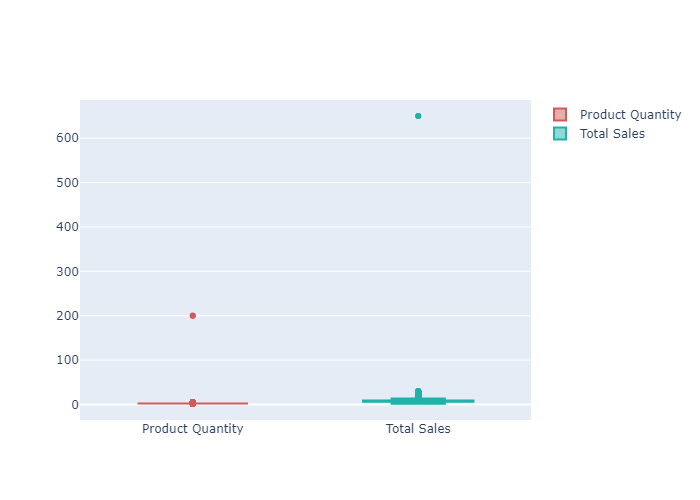

In [20]:
fig = go.Figure()

fig.add_trace(go.Box(y=transaction['PROD_QTY'], name='Product Quantity',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=transaction['TOT_SALES'], name = 'Total Sales',
                marker_color = 'lightseagreen'))

Image(pio.to_image(fig, format='png'))

The visualization above clearly reveals the extent of these outliers. We can see that they are way off the median value and these values may be impacting the overall average. We will zoom in to further examine these values and take the necessary actions.

In [21]:
transaction[transaction['PROD_QTY'] > 50]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


We can see that the outliers are as a result of the transaction of one customer who purchased the same quantity and weight of the same product `Dorito Corn Chp Supreme` on 2 different occasions from the same store. Since this values will impact the overall analysis we will be making in terms of average, we will drop these values.

In [22]:
# resetting the index of the dataframe

transaction.reset_index(inplace=True)
transaction.drop(columns=['index'], inplace=True)

In [23]:
# extracting index of outliers

outlier_indx = np.where(transaction['PROD_QTY'] > 50)
transaction.drop(index=list(outlier_indx[0]), inplace=True)

In [24]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


We can now see how significantly the mean changes for `PROD_QTY` and `TOT_SALES` columns

##### Creating Brand Name Column

We can see from the product name column that the brand name is always at the beginning of the product name. Therefore we will need to split the name and select the first item to represent the brand name.

In [25]:
transaction['BRAND'] = [val[0] for val in transaction['PROD_NAME'].str.split()]

In [26]:
# checking for unique values

transaction['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

We have about 28 different brand names, but we can clearly see that some of the names are not correct or have been abbreviated. To resolve this issue we will replace those values with the correct names as well as expand the abbreviations.

In [27]:
correct_names = {'rrd':'Red Rock Deli', 'red':'Red Rock Deli', 'ww':'Woolworths', 'ncc':'Natural','snbts':'Sunbites',
                 'infzns':'Infuzions','smith':'Smiths','dorito':'Doritos','grain':'Grain Waves', 'grnwves':'Grain Waves'}

transaction['BRAND'] = transaction['BRAND'].str.lower().replace(correct_names).str.upper()

In [28]:
transaction['BRAND'].unique()

array(['NATURAL', 'CCS', 'SMITHS', 'KETTLE', 'GRAIN WAVES', 'DORITOS',
       'TWISTIES', 'WOOLWORTHS', 'THINS', 'BURGER', 'CHEEZELS',
       'INFUZIONS', 'RED ROCK DELI', 'PRINGLES', 'TYRRELLS', 'COBS',
       'FRENCH', 'TOSTITOS', 'CHEETOS', 'SUNBITES'], dtype=object)

We have finally completed the cleaning for both datasets and we will proceed to perform our analysis. Depending on the kind of analysis you will like to perform, you can choose to merge both datasets which is what we will be doing in the next step. But before that let's have a final look at our data.

In [29]:
# assigning new column names 

transaction.columns = ['date', 'store_no', 'card_no', 'trans_ID', 'prod_no', 'prod_name', 'prod_quant', 
                       'total_sales', 'package_size', 'brand']

purchasing.columns = ['card_no', 'lifestage', 'subscription']

In [30]:
# removing package size from product name

transaction['prod_name'] = transaction['prod_name'].str.replace(r'([0-9]+[gG])','', regex=True)

##### Merging Datasets

In [31]:
transaction.head()

,date,store_no,card_no,trans_ID,prod_no,prod_name,prod_quant,total_sales,package_size,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,KETTLE


In [32]:
purchasing.head()

,card_no,lifestage,subscription
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [33]:
# merging the two dataframes

analytic_data = pd.merge(transaction, purchasing, on='card_no', how='left')

In [34]:
analytic_data.head()

,date,store_no,card_no,trans_ID,prod_no,prod_name,prod_quant,total_sales,package_size,brand,lifestage,subscription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,KETTLE,MIDAGE SINGLES/COUPLES,Budget


## 3. Exploratory Data Analysis<a id='eda'></a>

<p style="text-align:justify;">One of the goals for this project as mentioned earlier was to segment dataset and draw unique insights, including visualization of customer segments and their chip purchasing behaviour.. Based on this stated goal, we will perform any set of anylysis of our data to obtain insights that can help us arrive at some plausible conclusions.</p>

To achieve the first goal, we will look at general distirbutions of our features and try to answer the questions listed below:

* What is the total number of purchases made per package size?
* How many purchases were made per customer valuation?
* Which product brand was purchased alot by the customers?
* What is the purchasing count per customer lifestage?
* How does the total sales vary for each customer lifestage?
* How does the total product quantity vary for each customer lifestage?
* Are most premium valuation customers young individuals?
* How did purchasing made by customers changed over time ( days, weeks)?
* How did purchsing per customer valuation changed over time?

<b>NB: Questions that can be answered are not limited to the ones stated above.</b>

Before we generate insights from the data, we will define helper functions to help us visualize the data. We will be using the plotly library for our visualization.

In [35]:
layout = {'autosize': False,
    'width': 950,
    'height': 600,
    "xaxis": dict(titlefont=dict(size=15), visible=False),
    'yaxis': dict(titlefont=dict(size=15),),
    'paper_bgcolor': 'rgba(0,0,0,0)',
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'title_x': 0.5,
    'yaxis': {'categoryorder':'total ascending'}
    }


def bar_chart(data, x_col, y_col, text, title, x_title, y_title):
    fig = px.bar(data, x=x_col, y=y_col, orientation='h', text=text, color_discrete_sequence=px.colors.qualitative.D3)
    fig.update_traces(texttemplate='%{text:.1s}',textposition='outside',textfont={'family':"Arial",'size': 12,'color': "black"})
    fig.update_xaxes(title_text=x_title, automargin=True)
    fig.update_yaxes(title_text=y_title, automargin=True)
    fig.update_layout(layout, title_text = title, xaxis =dict(visible=False))
    fig.show('png')


def facet_row_bar(data, x_col, y_col, facet_row, text, title):
    fig = px.bar(data, x=x_col, y=y_col, orientation='h', facet_row=facet_row, text=text, 
                color_discrete_sequence=px.colors.qualitative.D3)
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))                     
    fig.update_traces(texttemplate='%{text:.3s}',textposition='inside',textfont={'family':"Arial",'size': 12,'color': "white"})
    fig.update_layout(layout, title_text = title, xaxis = dict(visible=False))
    fig.show('png')

    
def line_graph(data1, data2, data3, names):
    fig = go.Figure()
    fig = make_subplots(rows=3, cols=1) #subplot_titles=("Sales Per Day", "Sales Per Week", "Sales Per Month"))
    fig.add_trace(go.Scatter(x = data1['date'], y = data1['sum'], mode='lines', name=names[0],
                    line = dict(color='#1F77B4', width=1)), row=1, col=1)
    fig.add_trace(go.Scatter(x = data2['date'], y = data2['sum'], mode='lines+markers', name=names[1],
                    line = dict(color='#FF7F0E', width=1)), row=2, col=1)
    fig.add_trace(go.Scatter(x = data3['date'], y = data3['sum'], mode='lines+markers', name=names[2],
                    line = dict(color='#2CA02C', width=1)), row=3, col=1)
    fig.update_layout(layout)
    fig.show('png')

    
def pie_chart(data, column, labels, title):
    fig = go.Figure(data=[go.Pie(labels=labels, values=data[column],pull=[0, 0.1, 0], hole=0.6)])
    fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=15,
                  marker=dict(colors=px.colors.qualitative.D3, line=dict(color='#000000', width=2)))
    fig.update_layout(title_text = title, title_x=0.46)
    fig.show('png')

##### Question 1: Which package size was purchased more by customers?

To answer this question we will use the `package_size` column of our data.

In [36]:
pack_count = pd.DataFrame(analytic_data['package_size'].value_counts().reset_index().values, columns=['size', 'count'])

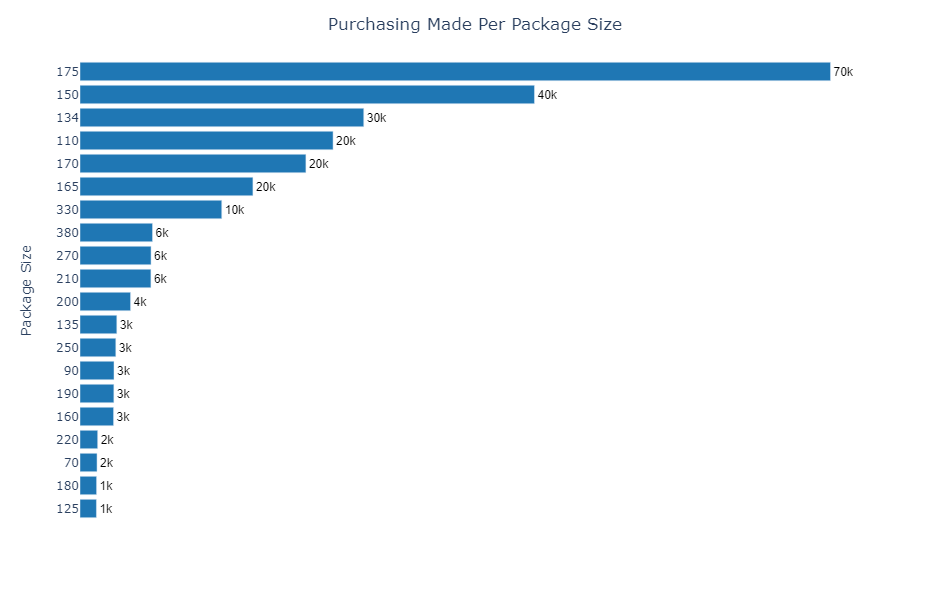

In [37]:
bar_chart(pack_count, 'count', 'size', 'count', 'Purchasing Made Per Package Size', 'Count', 'Package Size')

---
> From the graph above, we can infer that most customers neither prefer to buy too larger nor too small packages but most prefer to purchase packages between the sizes of `100g` and `160g`. We can see that `175g` has the highest purchasing count of about `66K` which is followed closely by `150g`. Smallest package sizes which are `70g` and `90g` have lower purchasing counts of about `1500` and `3000` counts respectively.
---

##### Question 2: Between the different customer valuations, how does the total number of purchases vary?

We will use the same approach above to answer this question but instead of bar chart we will use pie chart and the `subscription` column.

In [38]:
val_count = pd.DataFrame(analytic_data['subscription'].value_counts().reset_index().values, columns=['valuation', 'count'])

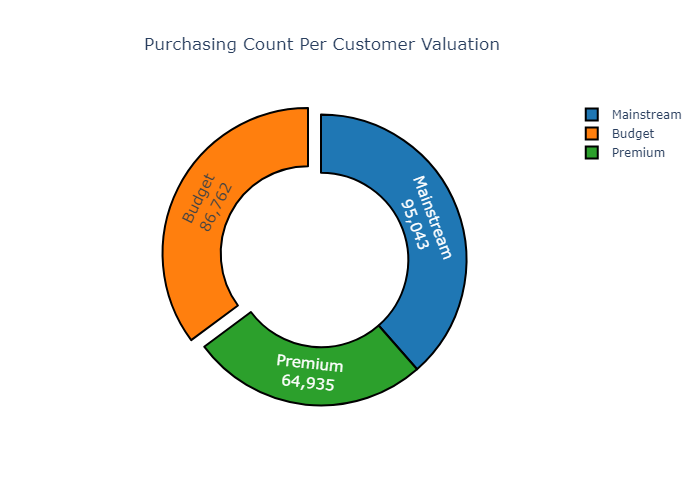

In [39]:
pie_chart(val_count, 'count', ['Mainstream', 'Budget', 'Premium'], "Purchasing Count Per Customer Valuation")

---
> We can see that customers with premium valuations have the least number of purchases of about `65,000` counts. This is about `26.3%` of the entire purchasing transactions. On the flip side, Mainstream customers dominate with about `39%` of purchases and followed closely by Budget customers with a purchasing percentage of about `35%`. This quite understandable since premium valuations are conditioned on the overall purchasing behaviour of the customers.
---

##### Question 3: Which product brand was purchased alot by the customers?

We will use the `brand` column of our data to answer this question and then plot a stacked bar graph to compare customer valuation results as well. 

In [40]:
brand_count = pd.DataFrame(analytic_data['brand'].value_counts().reset_index().values, columns=['brand', 'count'])

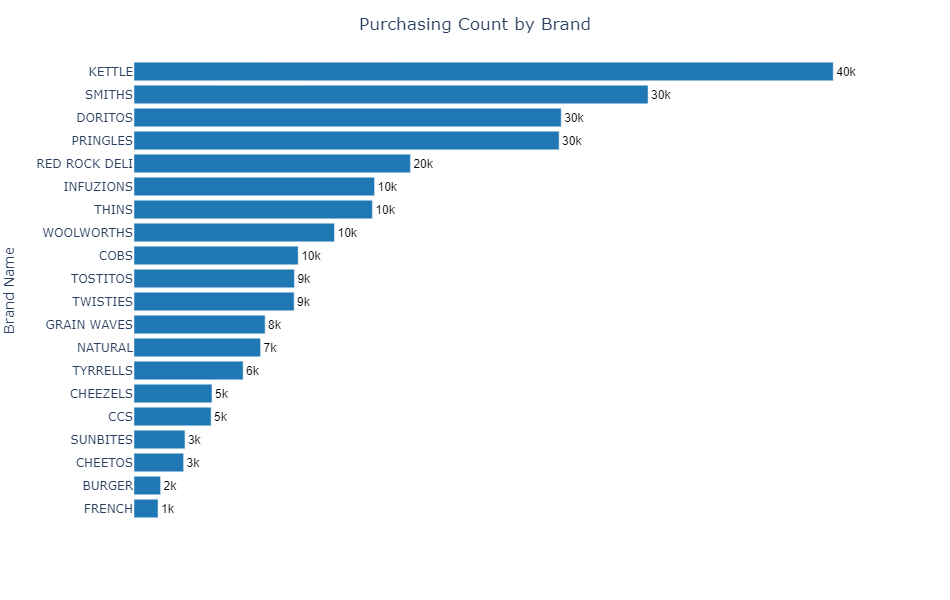

In [41]:
bar_chart(brand_count, 'count', 'brand', 'count', 'Purchasing Count by Brand', 'Count', 'Brand Name')

---
> We can see that most of the customers, that is about `42000` prefer `KETTLE` brands followed by `SMITHS`, `DORITOS` and `PRINGLES` brand. Fewer customers of about `1500` approximately prefer `FRENCH` and `BURGER` brands.

> This same approach can be used to understand brand purchases over a specified period of time (Days, Weeks and Months)
---

##### Question 4: Do older customers purchase more and often as compared to the younger ones?

To answer this question we will use the `lifestage` column and visualize the data based on `valuation` column.

In [42]:
lifestage_count = pd.DataFrame(analytic_data[['subscription','lifestage']].value_counts().reset_index().values, 
                               columns=['valuation','lifestage', 'count'])

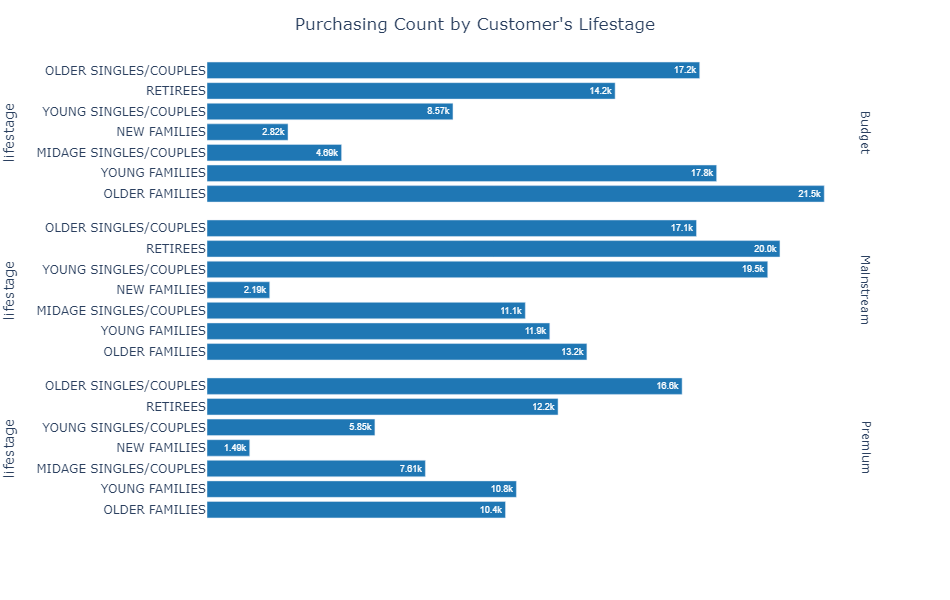

In [43]:
facet_row_bar(lifestage_count, 'count', 'lifestage', 'valuation', 'count', "Purchasing Count by Customer's Lifestage")

---
> The above output shows that most of the customers are from the older category with the top three being `OLDER SINGLES/COUPLES`, `RETIREES` and `OLDER FAMILIES`. Looking at the valuation display, we see that for `OLDER SINGLES/COUPLES` most of the customers are in the `BUDGET` category which is same for `OLDER FAMILIES`. Also, we see that most of the `MAINSTREAM` customers in the `RETIREES` and `YOUNG SINGLES/COUPLES` lifestage.
---

##### Question 5: How does the total sales vary for each customer lifestage?

To answer this question we will use the `lifestage`, `total_sales` and `subscription` columns and find the total sales for each customer lifestage.

In [44]:
life_sale = analytic_data[['lifestage','total_sales','subscription']].groupby(['lifestage','subscription']).sum().reset_index()

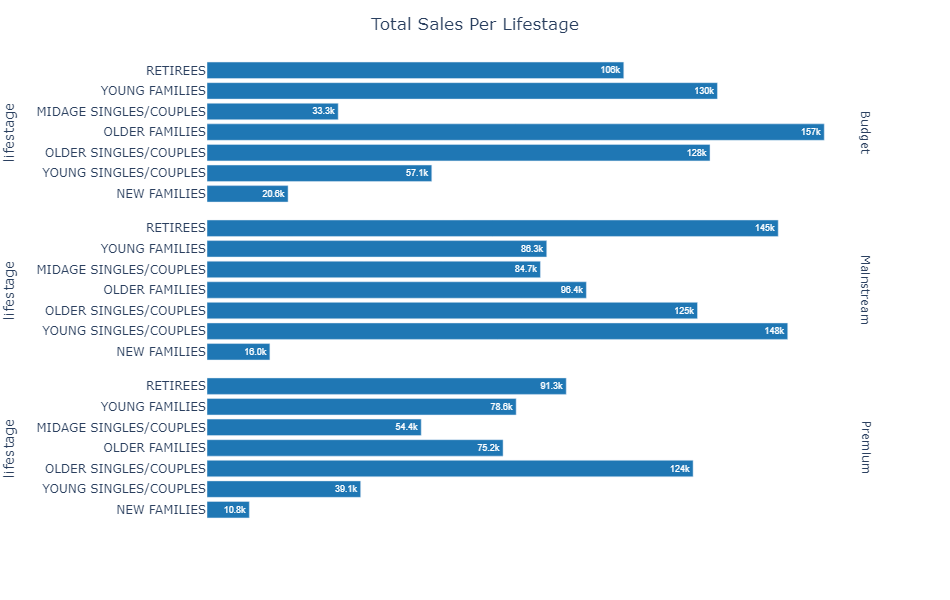

In [45]:
facet_row_bar(life_sale, 'total_sales', 'lifestage', 'subscription', 'total_sales', "Total Sales Per Lifestage")

---
> Pertaining to the total sales, the highest total sales occured for customers with `Budget` valuation and they are from the `OLDER FAMILIES` lifestage category. They are followed closely by `RETIREES` and `YOUNG SINGLES/COUPLES` who are from the `MAINSTREAM` customer valuation. We can also see that the least number of sales occured for the `NEW FAMILIES` in all the customer valuation categories.
---

##### Question 6: How does the total product quantity vary for each customer lifestage?

Again, we will use the same approach as the one above but instead we will replace total sales with product quantity.

In [46]:
prod_quant = analytic_data[['lifestage','prod_quant','subscription']].groupby(['lifestage','subscription']).sum().reset_index()

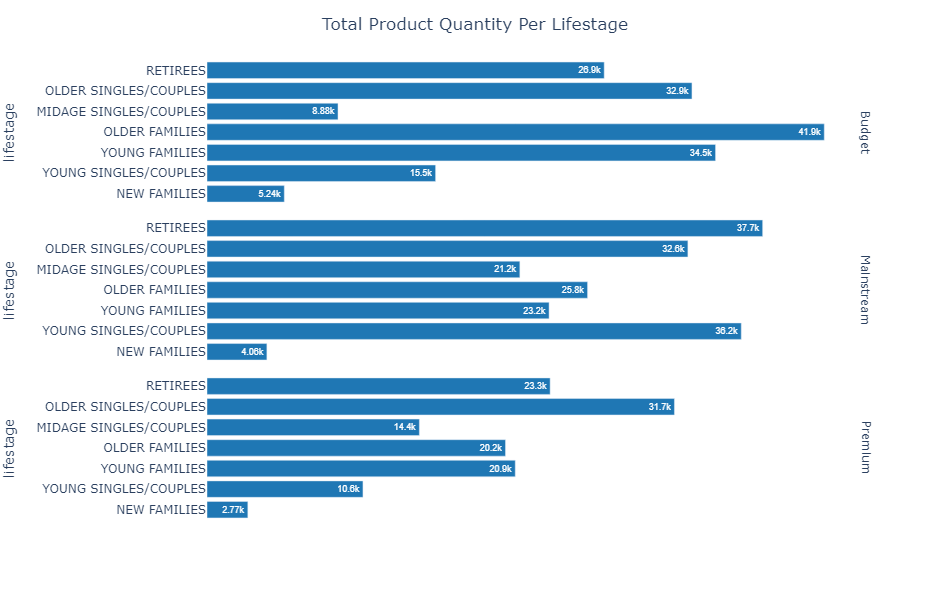

In [47]:
facet_row_bar(prod_quant, 'prod_quant', 'lifestage', 'subscription', 'prod_quant', "Total Product Quantity Per Lifestage")

---
> We can see the same outcome from the total sales graph. Which might gives us a clue as to the relationship between this two columns. We can say that, depending on the total quantity of products purchased, we can estimate the sales per customer. But then again, this assumption can be affected by other extraneous factors.
---

Now we will segment our dataset to analyze total sales and product quantity over a period of time that is days, weeks and months.

In [48]:
sales_time = analytic_data[['date', 'total_sales', 'prod_quant']]

In [49]:
# sales/quant_per_day
sales_per_day = pd.DataFrame({'sum' : sales_time.set_index('date').resample('D')["total_sales"].sum()}).reset_index()
quant_per_day = pd.DataFrame({'sum' : sales_time.set_index('date').resample('D')["prod_quant"].sum()}).reset_index()

# sales/quant per week
sales_per_week = pd.DataFrame({'sum' : sales_time.set_index('date').resample('W')["total_sales"].sum()}).reset_index()
quant_per_week = pd.DataFrame({'sum' : sales_time.set_index('date').resample('W')["prod_quant"].sum()}).reset_index()

# sales/quant per month
sales_per_month = pd.DataFrame({'sum' : sales_time.set_index('date').resample('M')["total_sales"].sum()}).reset_index()
quant_per_month = pd.DataFrame({'sum' : sales_time.set_index('date').resample('M')["prod_quant"].sum()}).reset_index()

##### Question 7: How did total sales made changed over time ( days, weeks)?

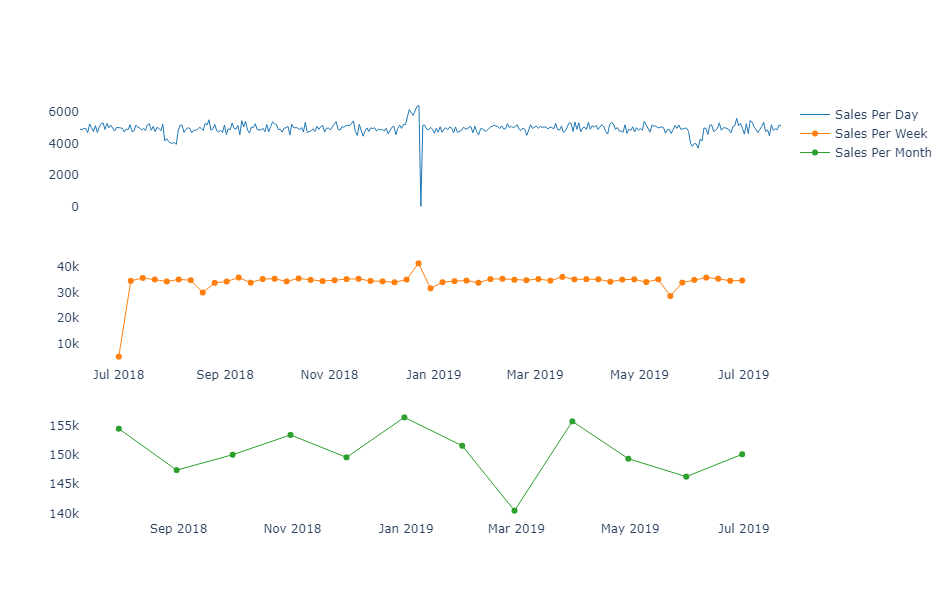

In [50]:
line_graph(sales_per_day, sales_per_week, sales_per_month, ['Sales Per Day', 'Sales Per Week', 'Sales Per Month'])

##### Question 8: How did product qunatity purchased changed over time ( days, weeks)?

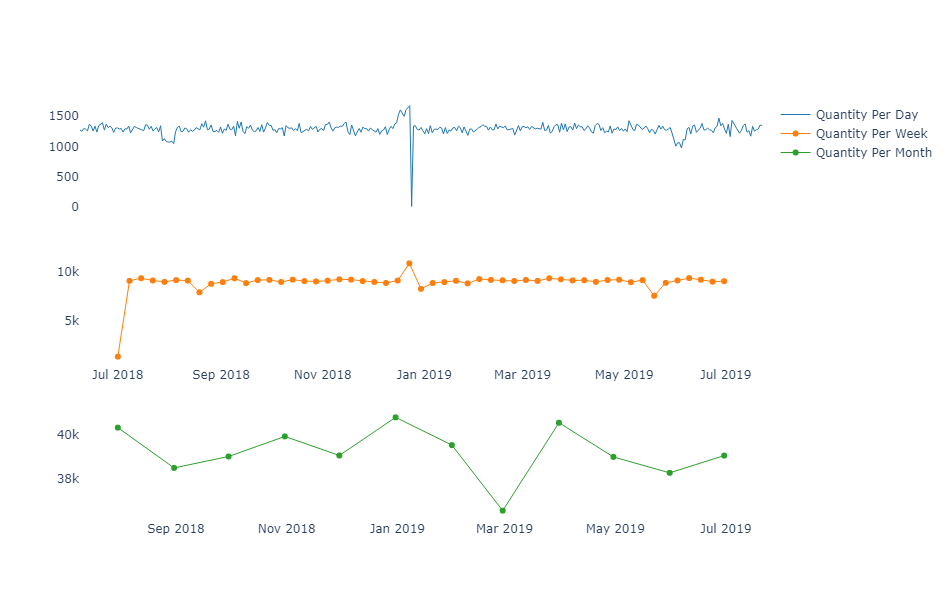

In [51]:
line_graph(quant_per_day, quant_per_week, quant_per_month, ['Quantity Per Day', 'Quantity Per Week', 'Quantity Per Month'])

---
> Just as we saw for the total sales and total product quantity purchased per customer were almost the same, if we look at the same categories over a period of time we can see similar trends from the graphs. This buttresses the assumption we made earlier that total sales can be estimated based on product quantity purchased. Looking at the two graphs, we can also see that a total rise in product purchased and total sales between `16th` to `23rd` December. This makes a lot of sense since most people make purchases as the festive periods approach. But zooming in to sales and product quantity per day, we can see that there is a dip in these categories on `25th` December which is quite strange. Per our data no purchases were made on this day which could mean only two things, either customers purchased all they needed before that date, or the company doesn't operate on holidays. The former could make sense since the highest sales were made on `24th` December.
---

##### Question 9: What other product did customers purchase?

In [52]:
text = " ".join(str(review) for review in analytic_data['prod_name'] .dropna())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

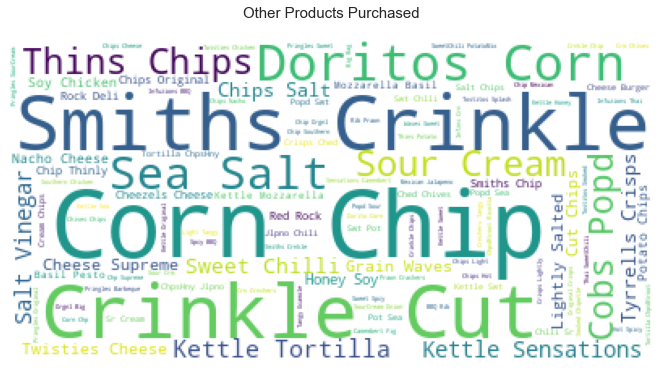

In [53]:
plt.figure(figsize = (9, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Other Products Purchased\n", size=15)
plt.tight_layout(pad = 0)
plt.show()

---
> Looking at the wordcloud, we can see that most of the products purchased by customers also includes `Sea Salt`, `Honey Soy`, `Sweet Chilli`, `Chicken`, `Sour Cream`, `Cheese` etc.
---

##### Question 10: How much do customers pay for every unit of products they purchased?

Here, we will have to create a new comlumn and compute the price per unit for each each transaction.

In [54]:
analytic_data['unit_price'] = analytic_data['total_sales']/analytic_data['prod_quant']

In [55]:
unit_price = analytic_data[['lifestage','subscription', 'unit_price']].groupby(['lifestage','subscription']).mean()
unit_price.reset_index(inplace=True)

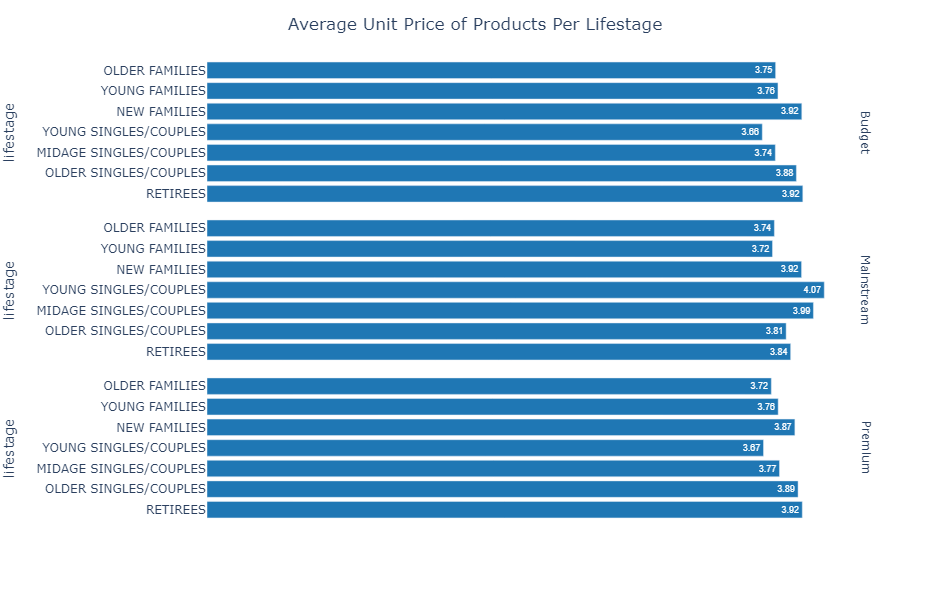

In [56]:
facet_row_bar(unit_price, 'unit_price', 'lifestage', 'subscription', 'unit_price', "Average Unit Price of Products Per Lifestage")

---
> We can see from the chart above that the average unit price for different customer valuations are almost the same with `Mainstream` `YOUNG SINGLES/COUPLES` paying `4.07 dollars` for every unit of products purchased. They are followed closely by `Budget` `NEW FAMILIES AND RETIREES` who also pay `3.92 dollars`. Even though the difference in unit price for the various valuations of customers are not really huge, it is clear that `Mainstream` customers pay more. This can be argued because from our inital EDA, we see that most of the customers are from `Mainstream` valuation. In order to truly determine the significant difference in unit price and to find out if the difference is not mainly due to more customers in the `Mainstream` valuation, we will perform an `ANOVA` test. 
---

In the next task, we will perform ANOVA test to determine if the difference in average unit price between the various customer valuations are truly significant.

### 3.1 Performing ANOVA Test<a id='pat'></a>
<br>

In order to make sure we working with the same sample size for each customer valuation, we will randomly sample the same number of observation for all the customer valuations.

**Why did we choose ANOVA instead of Independent T-test?**

An Analysis of Variance Test, or ANOVA, can be thought of as a generalization of the t-tests for more than 2 groups. The independent t-test is used to compare the means of a condition between two groups. ANOVA is used when we want to compare the means of a condition between more than two groups. In our case, we want to find the difference in mean unit price for 3 differenct customer valuations which consequently means we will be performing a One-Way ANOVA test. A `one-way ANOVA` has just one independent variable. For example, differences in Corona cases can be assessed by Country, and a Country can have 2, 20, or more different categories to compare.


**NB:**<br> 
ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect), but it does not tell us where the difference is (if there is one). To find where the difference is between the groups, we have to conduct post-hoc tests.

<br>
<br>

**`ANOVA Hypotheses`**

**Null hypothesis:** Groups means are equal (no variation in means of groups).<br>
<br>
$H_0:$ $μ_1$ = $μ_2$ = ......  = $μ_p$
<br>
<br>

**Alternative hypothesis:** At least, one group mean is different from other groups.<br>
<br>
$H_1:$ All $μ$ are not equal

<br>
<br>

**`ANOVA Assumptions`**

- Residuals (experimental error) are normally distributed (Shapiro-Wilks Test)
- Homogeneity of variances (variances are equal between treatment groups) (Levene’s or Bartlett’s Test)
- Observations are sampled independently from each other

We will begin by checking the distribution for the unit price for various subscriptions and then randomly sample `20000` observations for the ANOVA test.

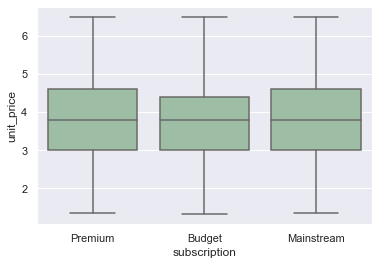

In [57]:
# checking the distribution 

ax = sns.boxplot(x='subscription', y='unit_price', data=analytic_data, color='#99c2a2')
plt.show()

---
>From the boxplot we can see that the distribution of unit price for the various customer valuations are approximately normal.
However, we will go ahead and transform them into normal distributions after randomly sampling our data.
---

In [58]:
# randomly sampling 20000 observations

np.random.seed(100)

dat=pd.DataFrame({'Mainstream':random.sample(list(analytic_data[analytic_data['subscription']=='Mainstream']['unit_price']),100),
                  'Budget': random.sample(list(analytic_data[analytic_data['subscription']=='Budget']['unit_price']), 100),
                  'Premium': random.sample(list(analytic_data[analytic_data['subscription']== 'Premium']['unit_price']), 100)})

In [59]:
dat

,Mainstream,Budget,Premium
0,5.7,5.4,5.9
1,4.4,2.8,3.3
2,4.4,3.9,4.6
3,6.5,5.7,3.7
4,4.4,3.8,1.9
...,...,...,...
95,4.2,3.0,5.7
96,3.3,2.7,3.3
97,3.0,4.6,4.6
98,4.6,2.7,3.0


In [60]:
# transforming columns into normal distributions

dat['Mainstream'], fitted_lambda = stats.boxcox(dat['Mainstream'])
dat['Budget'], fitted_lambda = stats.boxcox(dat['Budget'])
dat['Premium'], fitted_lambda = stats.boxcox(dat['Premium'])

Now we can perform the one-way ANOVA test on our sampled data.

In [61]:
# performing one-way anova test

F_statistic, p_value = stats.f_oneway(dat['Premium'], dat['Budget'], dat['Mainstream'])
print('F statistic =', F_statistic,  '\np value :', p_value)

F statistic = 6.963642227421764 
p value : 0.0011078880890770914


---
**Interpretation**

>The p value obtained from ANOVA analysis is lesser than the alpha value(p < 0.05), and therefore, we conclude that there are significant differences in the mean unit price between the various customer valuations.
---

We will go ahead and even develop a more comprehensive one-way anova test using the OLS model. We should get approximately the same p-value.

In [62]:
# alternate anova test

new_dat = dat.stack().to_frame().reset_index().rename(columns={'level_1':'Valuation', 0:'Count'})
new_dat.drop(columns=['level_0'], inplace=True)

In [63]:
# OLS Model

model = ols('Count ~ C(Valuation)', new_dat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     6.964
Date:                Thu, 02 Dec 2021   Prob (F-statistic):            0.00111
Time:                        12:51:28   Log-Likelihood:                -295.04
No. Observations:                 300   AIC:                             596.1
Df Residuals:                     297   BIC:                             607.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.8894      0.065     29.057      0.000       1.761       2.017
C(Valuation)[T.Mainstream]     0.2211      0.092      2.405      0.017       0.040       0.402
C(Valuation)[T.Premium]        0.3378      0.092      3.674      0.000       0.157       0.519
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.545
Skew:                          -0.032   Prob(JB):                        0.462
Kurtosis:                       2.654   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# checking if the overall model is significant

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 2, 297) =  6.964, p =  0.0011


---
> The p-value attained from the OLS model is approximately the same as the p-value attained earlier. However, this model gives us in-depth knowledge about certain factors we might be interested in like the residuals, skew, r-squared etc.
---

From ANOVA analysis, we know that unit price differences are statistically significant, but ANOVA does not tell which customer valuations are significantly different from each other. To know the pairs of significant different valuations, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

#### Post-Hoc Analysis

In [65]:
# post-hoc analysis

res = stat()
res.tukey_hsd(new_dat, res_var='Count', xfac_var='Valuation', anova_model='Count ~ C(Valuation)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Mainstream,Budget,0.221117,0.004503,0.437731,3.400636,0.044205
1,Mainstream,Premium,0.116719,-0.099895,0.333333,1.795062,0.415399
2,Budget,Premium,0.337835,0.121221,0.554449,5.195698,0.001000


---
>Above results from Tukey’s HSD suggests that, two of the pairwise comparisons for customer valuations rejects null hypothesis (p < 0.05) and indicates statistical significant differences in mean unit price. However, due to the random sampling, we would expect to have one of the groups having p-value greater than `0.05` but we will still work with the overall p-value.
---

Alternatively, we can also use statsmodels multiple comparison library to dedeuce the same result. With the this approach the model explicitly states which comparison rejects and accepts the null hypothesis.

In [66]:
# post-hoc analysis using statsmodels

model = statsmodels.stats.multicomp.MultiComparison(new_dat['Count'], new_dat['Valuation'])
model_results = model.tukeyhsd()

print(model_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
    Budget Mainstream   0.2211 0.0442  0.0045 0.4377   True
    Budget    Premium   0.3378  0.001  0.1212 0.5544   True
Mainstream    Premium   0.1167 0.4154 -0.0999 0.3333  False
-----------------------------------------------------------


---
> We have the same results as we had earlier except that for this result, the rejection or acceptance is explicitly stated.
---

### 3.2 Testing ANOVA Assumptions<a id='taa'></a>

- ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.


- The visual approaches perform better than statistical tests. For example, the Shapiro-Wilk test has low power for small sample size data and deviates significantly from normality for large sample sizes.

Now, we will generate QQ-plot from standardized residuals (outliers can be easily detected from standardized residuals than normal residuals)

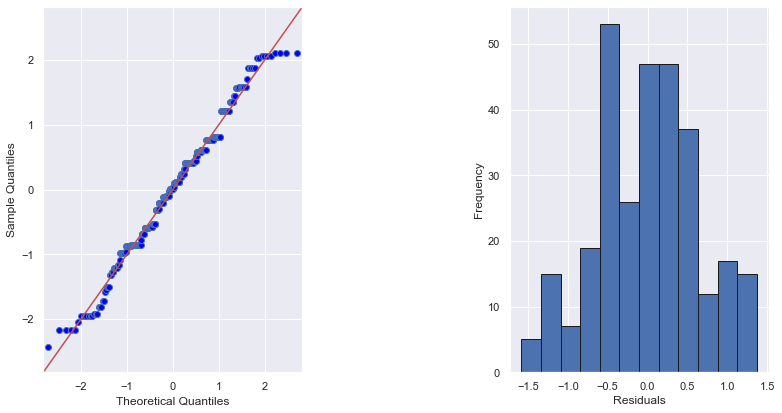

In [67]:
fig = plt.figure(figsize=(13,7))
fig.subplots_adjust(top=0.85, wspace=0.8)

ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("Theoretical Quantiles")
ax1.set_ylabel("Standardized Residuals")
sm.qqplot(res.anova_std_residuals, line='45', ax=ax1)

# histogram
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel("Residuals")
ax2.set_ylabel('Frequency')
ax2.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 

plt.show()

---
> As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed. In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed
---

The next step is to check the Homogeneity of variances.

**Null hypothesis:** samples from populations have equal variances.

In [68]:
w, pvalue = stats.bartlett(dat['Mainstream'], dat['Budget'], dat['Premium'])
print(w, pvalue)

7.677364603625779 0.021521942092792012


---
> The p-value is less than 0.05 which means we reject the null hypothesis that says there is no difference in the variance. However, these variations could be due to outliers present in our data as well as the random sampling method used for the large dataset.
---

The next task we will perform will be to deeply analyse customer purchasing behavior using market basket analysis.

### 3.3 Affinity or Market-Basket Analysis<a id='amba'></a>

**`Affinity analysis`** or **`Market basket analysis`**, is a data mining technique used to understand the purchase behavior of customers. That is, it largely involves the process of finding connections between different items based on the subject's view of these items. Affinity analysis is used for studying patterns and behavior in customers to determine links in purchases.

For example, market basket analysis might tell us that customers who purchase Doritos also tend to buy Tyrrells in a certain year or transaction, so putting both items on promotion at the same time would not create a significant increase in revenue, while a promotion involving just one of the items would likely drive sales of the other.

The first step in affinity analysis is to identify the subject, which may be defined on certain conditions. The next step is to observe and then record the habits of this subject.
<br>
<br>
<br>

**Association Rule:** 

Association rules are normally written like this: **`{Kettle} -> {Doritos}`** which means that there is a strong relationship between customers that purchased diapers and also purchased beer in the same transaction.

In the above example, the **`{Kettle}`** is the antecedent and the **`{Doritos}`** is the consequent. Both antecedents and consequents can have multiple items. In other words, **`{Diaper, Gum}`** -> **`{Beer, Chips}`** is a valid rule.
<br>
<br>

**`Support:`** Is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.
<br>
<br>

**`Confidence:`** Is a measure of the reliability of the rule. A confidence of .5 in the above example would mean that in 50% of the cases where Diaper and Gum were purchased, the purchase also included Beer and Chips.The probability that a customer will purchase an item on the condition of purchasing other items is referred to as the confidence of the rule. Confidence can be used for product placement strategy and increasing profitability. Placing high margin items near associated high confidence (driver) items can increase the overall margin on purchases.
<br>
<br>

**`Lift:`** The lift of the rule is the ratio of the support of the left-hand side of the rule (Kettle) co-occurring with the right-hand side (Doritos), divided by the probability that the left-hand side and right-hand side co-occur if the two are independent. A lift greater than 1 suggests that the presence of the antecedent increases the chances that the consequent will occur in a given transaction.

---
>Lift below 1 indicates that purchasing the antecedent reduces the chances of purchasing the consequent in the same transaction. Note: This could indicate that the items are seen by customers as alternatives to each otherWhen the lift is 1, then purchasing the antecedent makes no difference on the chances of purchasing the consequent
---



From the EDA we performed above, we discovered that most of the customers were valuated as Mainstream and out of these customers most of them were `RETIREES` and `YOUNG/SINGLE COUPLES` lifestage. We will focus on this segment of people for the affinity analysis but we must know that the same analysis can be applied to different segments of our data.

In [69]:
data_basket = analytic_data[(analytic_data['lifestage'] == 'YOUNG SINGLES/COUPLES') & 
                            (analytic_data['subscription'] == 'Mainstream')].pivot_table(index="card_no", 
                                                                                         columns="brand", 
                                                                                         values="prod_quant", 
                                                                                         aggfunc="sum",
                                                                                         fill_value=0) 

In [70]:
data_basket.head()

brand,BURGER,CCS,CHEETOS,CHEEZELS,COBS,DORITOS,FRENCH,GRAIN WAVES,INFUZIONS,KETTLE,NATURAL,PRINGLES,RED ROCK DELI,SMITHS,SUNBITES,THINS,TOSTITOS,TWISTIES,TYRRELLS,WOOLWORTHS
card_no,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1010,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0


There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. 

In [71]:
# function to perform encoding of values

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

enc_basket = data_basket.applymap(encode_units)

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 5% (this number was chosen so that I could get enough useful examples).

In [72]:
frequent_items = apriori(enc_basket, min_support=0.05, use_colnames=True)

The final step is to generate the rules with their corresponding support, confidence and lift

In [73]:
rules = association_rules(frequent_items, metric="lift")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DORITOS),(KETTLE),0.260326,0.387142,0.089933,0.345463,0.892344,-0.010850,0.936324
1,(KETTLE),(DORITOS),0.387142,0.260326,0.089933,0.232300,0.892344,-0.010850,0.963494
2,(PRINGLES),(DORITOS),0.256158,0.260326,0.062650,0.244576,0.939499,-0.004034,0.979151
3,(DORITOS),(PRINGLES),0.260326,0.256158,0.062650,0.240660,0.939499,-0.004034,0.979590
4,(SMITHS),(DORITOS),0.202476,0.260326,0.051156,0.252651,0.970519,-0.001554,0.989731


---
> As we stated earlier, lift below 1 indicates that purchasing the antecedent reduces the chances of purchasing the consequent in the same transaction. Note: This could indicate that the items are seen by customers as alternatives to each other. When the lift is 1, then purchasing the antecedent makes no difference on the chances of purchasing the consequent.

> As we can see from the resulting dataframe, the lift values are well closer to 1 which could mean that customers see these brands as alternatives to each other and this is even clearer with the confidence values we are getting. The probability that the consequent will be purchased based on the antecedents is really low. If customers are seeing these brands as alternatives, then its clear that customers like to interchange between these seen brands.

> How then can we drive sales for the company based on these associations? We can see that `DORITOS` and `KETTLE` have the highest support which means they appear the most in our association rule, even though they have a lift value below 1, it will be okay to keep them available for customers since cutsomers will likely go for the other as alternative.
---

We have completed the Exploratory Data Analysis and have generated a lot of unique insights that can help Julia make informed decisions. In doing so we have also achieved the first goal of our project which is to segment data and discover unique insights from the data.

## 4. Experimentation and Uplifting<a id='eau'></a>

For this part of the project we will be examining the performance in `trial vs control stores` to provide a recommendation for each location based on our insight. Below are some of the areas we want you to focus on:

* **`Select control stores`** – we will explore the data and define metrics for our control store selection – we will have to think about what would make them a control store. Look at the drivers and make sure we visualise these in a graph to better determine if they are suited. 


* **`Assessment of the trial`** – this one should give us some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not. 


* **`Collate findings`** – we will then go ahead and summarise our findings for each store and provide a recommendation that we can share with Julia outlining the impact on sales during the trial period.

<br>

We must note that the client has asked us to evaluate the performance of a store trial which was performed in stores `77`, `86` and `88`. To be able to compare the trial stores with the control stores we will have to define some metric for masurement that are similar to these stores. In our case we will compute a couple of metrics that will help us make such comparisons and these metrics include;

* Monthly total sales revenue
* Monthly total number of customers
* Monthly average number of transactions per customer
* Monthly average chips per customer
* Monthly average price per unit

We will then go ahead and create a measure to compare different control stores to each of the trial stores. We will consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure based on the metrics calculated above. 

Once we have selected your control stores, compare each trial and control pair during the trial period. We want to test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.

### 4.1 Data Quality Assessment and Preprocessing<a id='dqap'></a>

To begin with this task we will load our data and perform all the quality checks.

In [74]:
# load data

tran_data = pd.read_csv('My Solution/QVI_data.csv')

In [75]:
# glimpse of the data

tran_data.head(2)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


In [76]:
# extra data information

tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [77]:
tran_data.columns = tran_data.columns.str.lower()

Upon close inspection, we can see that some of the columns are not properly formatted. Also, there are no missing values in our data which means the only cleaning we will have to do is to properly format the data types.

We will first begin by converting the date column to a datetime object.

In [78]:
# convert date to datetime object

tran_data['date'] = pd.to_datetime(tran_data['date'])

There are a number of columns we will have to reformat especially those that contain numeric values but won't be used for any calculation will have to be converted to categorical values.

In [79]:
# convert the other data types

changed_dtype = {'lylty_card_nbr':'category', 'store_nbr':'category', 'txn_id':'category', 'prod_nbr':'category'}

tran_data = tran_data.astype(changed_dtype)

As we stated earlier, we defined the metrics we will use to compare the trial and control stores and these were on monthly basis. Therefore, we will have to ensure the data used to calculate these metrics is uniform. In order to ensure this, we will include stores where transactions took place for every month of the year.

To do this we will first have to create a new column for `year_month`.

In [80]:
# creating year_month column

tran_data.insert(1, 'year_month', tran_data['date'].dt.to_period('M')) 

In [81]:
# deleting stores without transaction for 12 months

unique_month_tan = tran_data.groupby('store_nbr')['year_month'].nunique()
store_tran_less_12 = unique_month_tan[unique_month_tan !=12].index.to_list()   # creating a list of stores with trans < 12months

store_index = tran_data[tran_data['store_nbr'].isin(store_tran_less_12)].index  # collecting store index

print('Shape before dropping: {}\n'.format(tran_data.shape))

tran_data = tran_data.drop(store_index)  # drop stores using index
print('Shape before dropping: {}\n'.format(tran_data.shape))

print('Number of samples that are dropped: {}'.format(len(store_index)))

Shape before dropping: (264834, 13)

Shape before dropping: (264645, 13)

Number of samples that are dropped: 189


### 4.2 Metrics Calculation<a id='mc'></a>

For this section, we will compute the metrics we will use to compare the trial and control stores. We will create a new dataframe for thse metrics.

In [82]:
# creating a metrics dataframe
metrics_data = tran_data.groupby(['store_nbr','year_month']).agg({'tot_sales':'sum','lylty_card_nbr':'nunique',
                                                            'txn_id':'nunique','prod_qty':'sum'})

In [83]:
# computing other metrics

metrics_data['price_per_unit'] = metrics_data['tot_sales'] / metrics_data['prod_qty']
metrics_data['chips_per_txn'] = metrics_data['prod_qty'] / metrics_data['txn_id']

# rename column
metrics_data = metrics_data.rename(columns={'lylty_card_nbr':'nCustomers'})

metrics_data['txn_per_customer'] = metrics_data['txn_id'] / metrics_data['nCustomers']
metrics_data.drop(['txn_id'], axis=1, inplace=True)

Now we will consider only dataset that heppened before the trial period.

In [84]:
metrics_data.reset_index(inplace=True)

In [85]:
pre_trial = metrics_data[metrics_data['year_month'] < '2019-02']
trial = metrics_data[(metrics_data['year_month'] > '2019-01') & (metrics_data['year_month'] < '2019-05')]

Now we will go ahead and define a function that will compute the correlation between the trial stores and the control stores based on the metrics calculated. The correlation coefficients are the values we will use to compare the trial and control stores.

In [86]:
pre_trial.set_index(['store_nbr', 'year_month'], inplace=True)
trial.set_index(['store_nbr', 'year_month'], inplace=True)

In [87]:
def calculateCorr(store):
    '''Function that computes the correlation between control stor and trial store
    Args:
        store_number: this the store number to be compared
    Returns:
        dataframe: the resulting correlation coefficients
    '''
    
    calculated_corr = []
    calculated_metric = pre_trial[['tot_sales','nCustomers']]
    
    for i in calculated_metric.index:
        calculated_corr.append(calculated_metric.loc[store].corrwith(calculated_metric.loc[i[0]]))
    
    df= pd.DataFrame(calculated_corr)
    df.index = calculated_metric.index
    df = df.drop_duplicates()
    
    df.index=[s[0] for s in df.index]
    df.index.name="store_number"
    
    df = df.abs()
    df['mean_corr'] = df.mean(axis=1)
    df.sort_values(by = 'mean_corr', ascending = False, inplace = True)
    return df

### 4.3 Determination of Control Stores<a id='dcs'></a>

Now that we have our function ready, we can go ahead and compute the correlation between the trial stores and the other stores then based on the output we can decide which stores to use as our control stores. The trial stores assigned by the client are stores `77`, `86` and `88`.

We will first begin with trial store number 77.

#### 4.3.1 Determining Control Store for Trial Store 77<a id='77'></a>

We will go ahead and determine the stores that are highly correlated with the trial stores.

In [88]:
# determining correlation of other stores

trial_77 = calculateCorr(77)
trial_77.head()

,tot_sales,nCustomers,mean_corr
store_number,,,
77,1.000000,1.000000,1.000000
233,0.903774,0.990358,0.947066
119,0.867664,0.983267,0.925466
71,0.914106,0.754817,0.834461
3,0.806644,0.834207,0.820426


---
>Based on the output above, we see that stores `119`, `233` and `157` are highly correlated with our trial store `77`. Therefore, we choose store `233` as our control store since it has the highest correlation to our trial store in terms of `tot_sales` and `nCustomers`. We will visualize the similarities and then use statistical test to check for differences.
---

The next task we will perform is to visualize the various correlations for the various store numbers.

In [89]:
# defining helper functions

def b_chart(data, column, title):
    data[data[column].abs() > 0.7].plot(kind = 'bar', rot = 0, figsize = (12, 6))
    plt.title(title)
    plt.xlabel('Store Number')
    plt.ylabel('Correlation Co-efficient')
    plt.show()

def d_chart(data , trial_store, control_store, column, label):
    fig, ax = plt.subplots()
    sns.histplot(data.loc[trial_store][column], color = 'r', ax = ax, kde=True)
    sns.histplot(data.loc[control_store][column], color = 'g', ax = ax, kde=True)
    plt.legend(labels = label)
    plt.show()

def difference(data, trial_store, control_store):
    # difference between control and trial sales
    list_A = []
    for x in data.columns:
        list_A.append(ks_2samp(data.loc[trial_store][x], data.loc[control_store][x]))
    
    df = pd.DataFrame(list_A, index = data.columns)
    return df

def assessment(data, trial_store, control_store):
    list_B = []
    for x in trial.columns:
        list_B.append(ttest_ind(data.loc[trial_store][x].tail(2), data.loc[control_store][x].tail(2)))
    
    df = pd.DataFrame(list_B, index=data.columns)
    return df

Let us now visualize the various correlations between the stores.

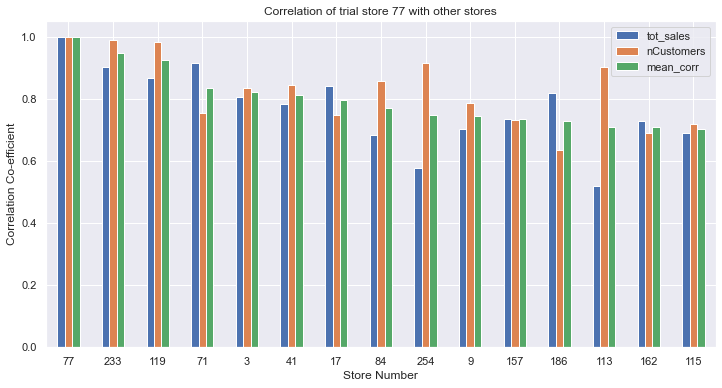

In [90]:
b_chart(trial_77, 'mean_corr', 'Correlation of trial store 77 with other stores')

---
>Just like we saw in the dataframe above, we can see that the correlation coefficient for different stores based on the metrics computed vary. We can see that store `254` and `113` also have one of the highest correlation coefficients for `nCustomers`. In summary, store `233` has the highest mean correlation coefficient with store `77`.
---

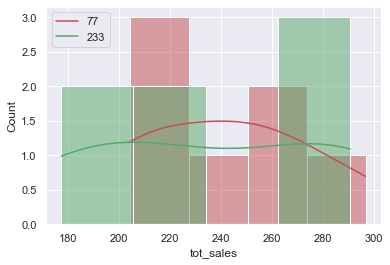

In [91]:
d_chart(pre_trial, 77, 233, 'tot_sales', ['77', '233'])

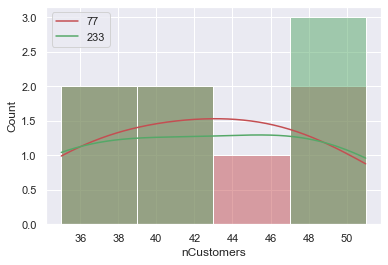

In [92]:
d_chart(pre_trial, 77, 233, 'nCustomers', ['77', '233'])

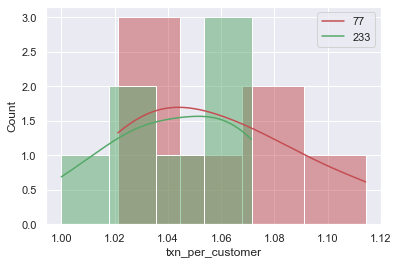

In [93]:
d_chart(pre_trial, 77, 233, 'txn_per_customer', ['77', '233'])

---
>Based on the distributions above, we can see that the overall distribution for store `77` and `233` overlap but with significant differences as well. Despite the differences, store `233` is still the best we can use as a control store. We will verify the difference using the p-value.
---

#### 4.3.2 Assessment and Difference of Control and Trial Store 77<a id='ad'></a>

Lets look at the difference between the control and trial store.

In [94]:
difference(pre_trial, 77, 233)

,statistic,pvalue
tot_sales,0.285714,0.962704
nCustomers,0.142857,0.999961
prod_qty,0.285714,0.962704
price_per_unit,0.285714,0.962704
chips_per_txn,0.285714,0.962704
txn_per_customer,0.428571,0.575175


---
>Again, using the statistical interpretation used in the ANOVA test, we can see that `p > 0.05`. This means we fail to reject the null hypothesis and conclude that there is no significant difference between the metrics for both the trial and control stores.
---

We defined the trial period to be between February to April 2019. Now we want to assess the performance of the trial and control store to see if there has been an uplift in chip sales.

In [95]:
assessment(trial, 77, 233)

,statistic,pvalue
tot_sales,4.267336,0.050769
nCustomers,2.586131,0.122618
prod_qty,4.043680,0.056063
price_per_unit,-0.634173,0.590828
chips_per_txn,1.785126,0.216165
txn_per_customer,0.332434,0.771171


---
> Overall, we can say that the total sales made by the trial and control store in the trial period is significantly different since the p-value is approximately equal to `0.05`. To confirm this we will verify if the t_statistic computed above for total sales (4.267336) is greater than the critical value.
---

In [96]:
print('critical t-value for 95% confidence level:')
t.ppf(0.95, df=5)

critical t-value for 95% confidence level:


2.015048372669157

---
> We can now confirm that the t_statistic is way greater than the right critical value. We therefore conclude that there is significant rise in performance of either of the stores. But to find out which really performed well during the triqal period, we will go ahead and visualize their total sales.
---

In [97]:
trial.loc[77]['tot_sales']

year_month
2019-02    235.0
2019-03    278.5
2019-04    263.5
Freq: M, Name: tot_sales, dtype: float64

In [98]:
trial.loc[233]['tot_sales']

year_month
2019-02    244.0
2019-03    199.1
2019-04    158.6
Freq: M, Name: tot_sales, dtype: float64

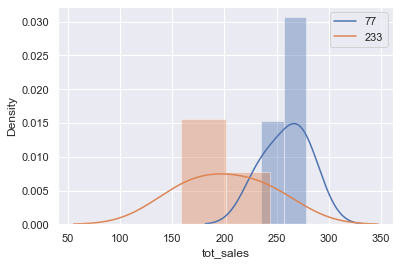

In [99]:
sns.distplot(trial.loc[77]['tot_sales'])
sns.distplot(trial.loc[233]['tot_sales'])
plt.legend(labels=['77','233'])
plt.show()

---
> Based on the distribution above, we can conclude that the store with highest performance within the trial period is the trial store `77`.
---

To conclude, we can say that the best control store for trial store `77` will be store `233`. Even though there is significant variation in the total sales made by these two stores for the month of `March` and `April`, we realized that there is no significant differences between the other metrics with p_values greater than `0.05`.

Also, we realized that the total sales for the trial store was significantly greater than that of the control store.

We will go through the same steps to evaluate the other trial stores stated in the task.

#### 4.3.3 Determining Control Store for Trial Store 86<a id='86'></a>

We will go ahead and determine the stores that are highly correlated with the trial stores.

In [100]:
# determining correlation of other stores

trial_86 = calculateCorr(86)
trial_86.head()

,tot_sales,nCustomers,mean_corr
store_number,,,
86,1.000000,1.000000,1.000000
155,0.877882,0.942876,0.910379
23,0.784698,0.943559,0.864128
120,0.872693,0.815097,0.843895
114,0.734415,0.855339,0.794877


---
>Based on the output above, we see that stores `155`, `23` and `120` are highly correlated with our trial store `86`. Therefore, we choose store `155` as our control store since it has the highest correlation to our trial store in terms of `tot_sales` and `nCustomers`. We will visualize the similarities and then use statistical test to check for differences.
---

Let us now visualize the various correlations between the stores.

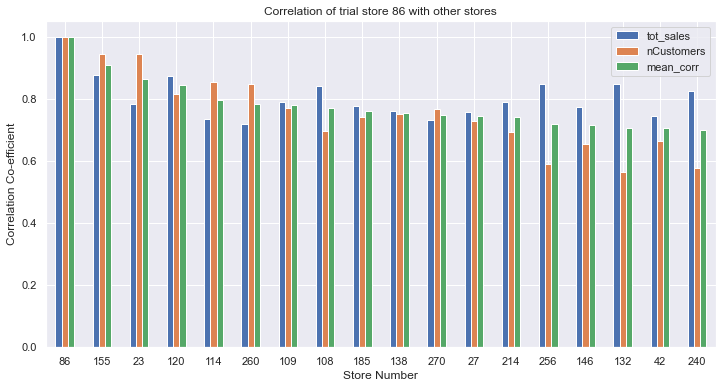

In [101]:
b_chart(trial_86, 'mean_corr', 'Correlation of trial store 86 with other stores')

---
>Just like we saw in the dataframe above, we can see that the correlation coefficient for different stores based on the metrics computed vary. We can see that store `108`, `256` and `132` also have one of the highest correlation coefficients for `tot_sales`. In summary, store `155` has the highest mean correlation coefficient with store `86`.
---

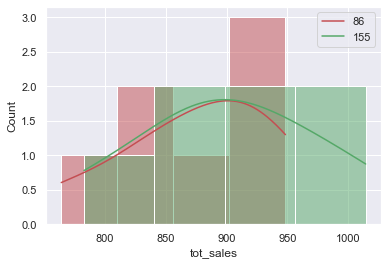

In [102]:
d_chart(pre_trial, 86, 155, 'tot_sales', ['86', '155'])

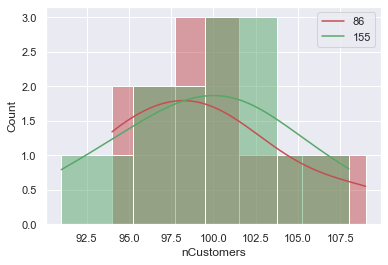

In [103]:
d_chart(pre_trial, 86, 155, 'nCustomers', ['86', '155'])

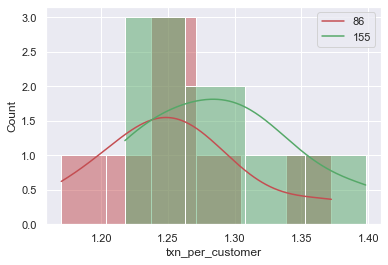

In [104]:
d_chart(pre_trial, 86, 155, 'txn_per_customer', ['86', '155'])

---
>Based on the distributions above, we can see that the overall distribution for store `86` and `155` overlap but with significant differences as well. Despite the differences, store `155` is still the best we can use as a control store. We will verify the difference using the p-value.
---

#### 4.3.4 Assessment and Difference of Control and Trial Store 86<a id='ad86'></a>

Lets look at the difference between the control and trial store.

In [105]:
difference(pre_trial, 86, 155)

,statistic,pvalue
tot_sales,0.285714,0.962704
nCustomers,0.285714,0.962704
prod_qty,0.285714,0.962704
price_per_unit,0.428571,0.575175
chips_per_txn,0.428571,0.575175
txn_per_customer,0.428571,0.575175


---
>Again, using the statistical interpretation used in the ANOVA test, we can see that `p > 0.05`. This means we fail to reject the null hypothesis and conclude that there is no significant difference between the metrics for both the trial and control stores.
---

We defined the trial period to be between February to April 2019. Now we want to assess the performance of the trial and control store to see if there has been an uplift in chip sales.

In [106]:
assessment(trial, 86, 155)

,statistic,pvalue
tot_sales,1.234512,0.342378
nCustomers,2.414953,0.137076
prod_qty,1.862532,0.203568
price_per_unit,0.366214,0.749316
chips_per_txn,-0.285938,0.801822
txn_per_customer,-1.074767,0.394929


---
> Overall, we can say that the total sales made by the trial and control store in the trial period is not significantly different since the p-value is greater than `0.05`. To confirm this we will verify if the t_statistic computed above for total sales (1.234512) is greater than the critical value.
---

In [107]:
print('critical t-value for 95% confidence level:')
t.ppf(0.95, df=5)

critical t-value for 95% confidence level:


2.015048372669157

---
> We can now confirm that the t_statistic is less than the right critical value. We therefore conclude that there is no significant difference in performance of either of the stores. But to find out which really performed well during the trial period, we will go ahead and visualize their total sales.
---

In [108]:
trial.loc[86]['tot_sales']

year_month
2019-02     913.2
2019-03    1026.8
2019-04     848.2
Freq: M, Name: tot_sales, dtype: float64

In [109]:
trial.loc[155]['tot_sales']

year_month
2019-02    891.2
2019-03    804.4
2019-04    844.6
Freq: M, Name: tot_sales, dtype: float64

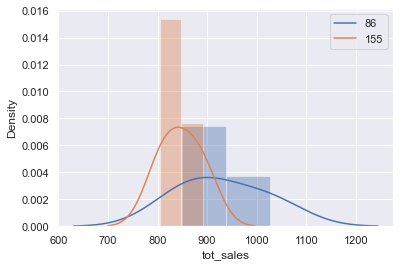

In [110]:
sns.distplot(trial.loc[86]['tot_sales'])
sns.distplot(trial.loc[155]['tot_sales'])
plt.legend(labels=['86','155'])
plt.show()

---
> Based on the distribution above, we can conclude that the store with highest performance within the trial period is the trial store `86`.
---

#### 4.3.5 Determining Control Store for Trial Store 88<a id='88'></a>

We will go ahead and determine the stores that are highly correlated with the trial stores.

In [111]:
# determining correlation of other stores

trial_88 = calculateCorr(88)
trial_88.head()

,tot_sales,nCustomers,mean_corr
store_number,,,
88,1.000000,1.000000,1.000000
178,0.731857,0.939466,0.835661
14,0.698557,0.942976,0.820767
133,0.735407,0.835426,0.785417
204,0.885774,0.550263,0.718018


---
>Based on the output above, we see that stores `178`, `14` and `133` are highly correlated with our trial store `88`. Therefore, we choose store `178` as our control store since it has the highest correlation to our trial store in terms of `tot_sales` and `nCustomers`. We will visualize the similarities and then use statistical test to check for differences.
---

Let us now visualize the various correlations between the stores.

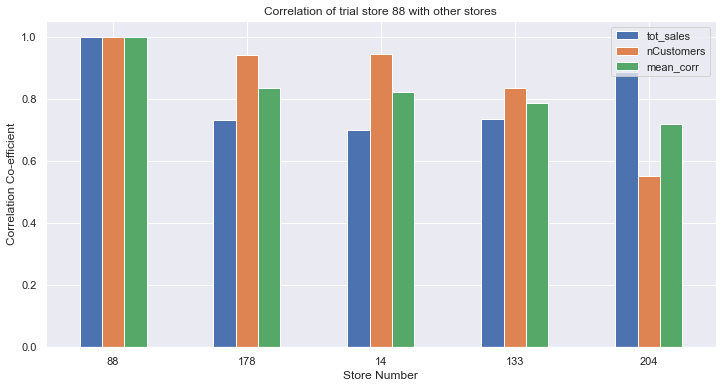

In [112]:
b_chart(trial_88, 'mean_corr', 'Correlation of trial store 88 with other stores')

---
>Just like we saw in the dataframe above, we can see that the correlation coefficient for different stores based on the metrics computed vary. We can see that store `204` and `133` also have one of the highest correlation coefficients for `tot_sales`. In summary, store `178` has the highest mean correlation coefficient with store `88`.
---

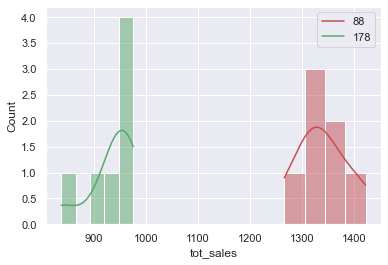

In [113]:
d_chart(pre_trial, 88, 178, 'tot_sales', ['88', '178'])

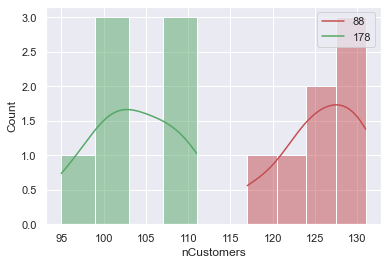

In [114]:
d_chart(pre_trial, 88, 178, 'nCustomers', ['88', '178'])

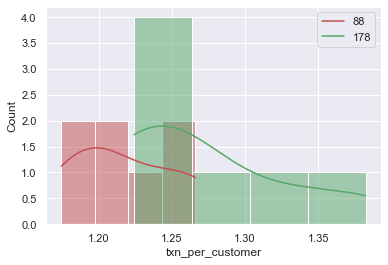

In [115]:
d_chart(pre_trial, 88, 178, 'txn_per_customer', ['88', '178'])

---
>Based on the distributions above, we can see that the overall distribution for store `88` and `178` do not really overlap. Despite the differences, store `178` is still the best we can use as a control store. We will verify the difference using the p-value.
---

#### 4.3.6 Assessment and Difference of Control and Trial Store 88<a id='ad88'></a>

Lets look at the difference between the control and trial store.

In [116]:
difference(pre_trial, 88, 178)

,statistic,pvalue
tot_sales,1.000000,0.000583
nCustomers,1.000000,0.000583
prod_qty,1.000000,0.000583
price_per_unit,1.000000,0.000583
chips_per_txn,0.428571,0.575175
txn_per_customer,0.571429,0.212121


---
>Again, using the statistical interpretation used in the ANOVA test, we can see that `p < 0.05` for the main metrics which are `tot_sales` and `nCustomers`. This means we reject the null hypothesis and conclude that there is significant difference between the metrics for both the trial and control stores.
---

We defined the trial period to be between February to April 2019. Now we will want to assess the performance of the trial and control store to see if there has been an uplift in chip sales.

In [117]:
assessment(trial, 88, 178)

,statistic,pvalue
tot_sales,11.956124,0.006923
nCustomers,4.621207,0.043774
prod_qty,3.668811,0.066922
price_per_unit,16.644482,0.003590
chips_per_txn,-0.514930,0.657864
txn_per_customer,0.652204,0.581212


---
> Overall, we can say that the total sales made by the trial and control store in the trial period is significantly different since the p-value is less than `0.05`. To confirm this we will verify if the t_statistic computed above for total sales (11.956124) is greater than the critical value.
---

In [118]:
print('critical t-value for 95% confidence level:')
t.ppf(0.95, df=5)

critical t-value for 95% confidence level:


2.015048372669157

---
> We can now confirm that the t_statistic is greater than the right critical value. We therefore conclude that there is significant difference in performance of either of the stores. But to find out which really performed well during the trial period, we will go ahead and visualize their total sales.
---

In [119]:
trial.loc[88]['tot_sales']

year_month
2019-02    1370.2
2019-03    1477.2
2019-04    1439.4
Freq: M, Name: tot_sales, dtype: float64

In [120]:
trial.loc[178]['tot_sales']

year_month
2019-02    1088.8
2019-03     998.8
2019-04    1059.8
Freq: M, Name: tot_sales, dtype: float64

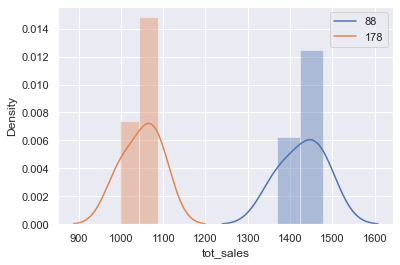

In [121]:
sns.distplot(trial.loc[88]['tot_sales'])
sns.distplot(trial.loc[178]['tot_sales'])
plt.legend(labels=['88','178'])
plt.show()

---
> Based on the distribution above, we can conclude that the store with highest performance within the trial period is the trial store `88`.
---

#### 4.3.7 Summary<a id='s'></a>

We were able to determine the most suitable control stores for the defined trial stores. And we went ahead to evaluate the performance of the trial stores against the control stores and we here are the summary of our findings;

* Store 233 was found to be the best control store for trial store 77
* Store 155 was found to be the best control store for trial store 86
* Store 178 was found to be the best control store for trial store 88
* The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86.
* Stocks should be high in December before the Christmas
* Kettle, Smiths, Doritos and Pringles should be kept in stocks as they are the most sold
* Mainstream young singles/couples, retirees are the account for a great share of chips sale so they need much attention. 
* Budget older families have the maximum contribution to sales.
